In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('messidor.csv')
df.head()
#train,test = train_test_split(df, test_size=.75)

,quality_assessment,pre-screening_results,MA_1,MA_2,MA_3,MA_4,MA_5,MA_6,exudate_1,exudate_2,exudate_3,exudate_4,exudate_5,exudate_6,exudate_7,exudate_8,distance_macula_opticdisk,diameter_opticdisk,am_fm,class_label
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [9]:
from sklearn import preprocessing
X=df.iloc[:,0:19].values
normalized_X = preprocessing.normalize(X,axis=0)
y=df.iloc[:,19].values
n=y.shape[0]
for i in range(n):
    if y[i]==0:
        y[i]=-1
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.4)
y_test=y_test.reshape(-1,1)

In [16]:
from sklearn.svm import SVC
#SVM
clf = SVC(C=0.00001,kernel='linear')
clf.fit(X_train, y_train)
w=clf.coef_
b=clf.intercept_
print("learned weights = \n",w)
print("\n")
print("learned intercept = \n",b)
y_pred=clf.predict(X_test).reshape(-1,1)
train_acc=clf.score(X_train,y_train)
test_acc=clf.score(X_test,y_test)
print('\n')
print("SVM train accuracy = ",train_acc)
print('\n')
print("SVM test accuracy = ",test_acc)

learned weights = 
 [[ 2.95269298e-07 -5.22891314e-06  2.41140362e-05  2.17063055e-05
   1.90349664e-05  1.61504820e-05  1.41789097e-05  1.18423152e-05
   4.17229728e-06 -3.26510650e-06 -1.66561055e-06 -1.70908409e-06
   3.06475606e-06  4.35982329e-06  6.85274692e-06  6.60599138e-06
  -3.36315196e-08  2.76470769e-07 -7.62492852e-06]]


learned intercept = 
 [0.99999566]


SVM train accuracy =  0.5246376811594203


SVM test accuracy =  0.5401301518438177


In [11]:
def error_sum(w,b,X,y):
    n=y.shape[0]
    ans=0
    for i in range(n):
        temp0=np.dot(w,X_train[i])+b
        temp1=1-temp0*y_train[i]
        temp2=0
        if temp1>0:
            temp2=temp1
        ans+=temp2
    return ans

  1%|          | 6/1000 [00:00<00:17, 56.31it/s]

(690, 19)


100%|██████████| 1000/1000 [00:14<00:00, 68.20it/s]


Text(0.5,1,'C vs the sum of training errors values')

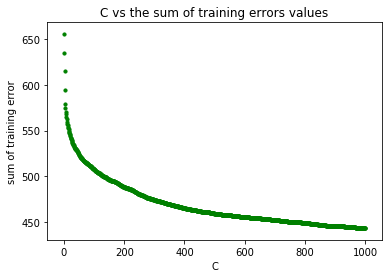

In [12]:
from tqdm import tqdm
print(np.shape(X_train))
for C in tqdm(range(1,1001)):
    clf = SVC(C=C,kernel='linear')
    clf.fit(X_train, y_train)
    w=clf.coef_
    b=clf.intercept_
    ans=error_sum(w,b,X_train,y_train)
    plt.scatter(C,ans,s=10,c='g')
clf = SVC(C=0.00001,kernel='linear')
clf.fit(X_train, y_train)
w=clf.coef_
b=clf.intercept_
ans=error_sum(w,b,X_train,y_train)
plt.scatter(0,ans,s=10,c='g')
plt.xlabel('C')
plt.ylabel('sum of training error')
plt.title('C vs the sum of training errors values')

100%|██████████| 1000/1000 [00:17<00:00, 53.82it/s]


test_accuracy_max =  0.7071583514099783
test_accuracy_max C =  964


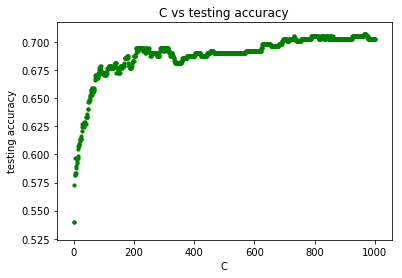

In [13]:
from tqdm import tqdm
max=0
C_max=0
for C in tqdm(range(1,1001)):
    clf = SVC(C=C,kernel='linear')
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test).reshape(-1,1)
    test_acc=clf.score(X_test,y_test)
    if test_acc>max:
        max=test_acc
        C_max=C
    plt.scatter(C,test_acc,s=10,c='g')
clf = SVC(C=0.00001,kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test).reshape(-1,1)
test_acc=clf.score(X_test,y_test)
plt.scatter(0,test_acc,s=10,c='g')
plt.xlabel('C')
plt.ylabel('testing accuracy')
plt.title('C vs testing accuracy')
print('test_accuracy_max = ', max)
print('test_accuracy_max C = ', C_max)

100%|██████████| 99/99 [00:03<00:00, 26.62it/s]


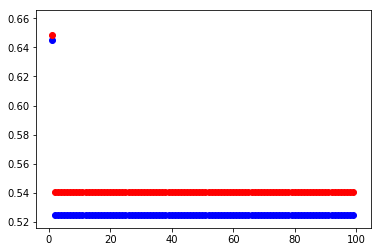

In [14]:
for N in tqdm(range(1,100)):
    clf = SVC(C=964,kernel='poly',degree=N)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test).reshape(-1,1)
    train_acc=clf.score(X_train,y_train)
    test_acc=clf.score(X_test,y_test)
    plt.scatter(N,train_acc,c='b')
    plt.scatter(N,test_acc,c='r')

100%|██████████| 1000/1000 [00:49<00:00, 20.16it/s]


train_accuracy_max =  1.0
train_accuracy_max gamma =  1418.360998078344
test_accuracy_max =  0.7635574837310195
test_accuracy_max gamma =  11.851713691863404


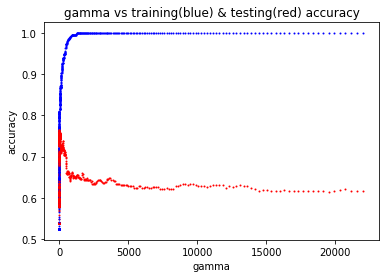

In [15]:
train_max=0
test_max=0
gamma_train_max=0
gamma_test_max=0
for N in tqdm(np.linspace(-10,10,1000)):
    clf = SVC(C=964,kernel='rbf',gamma=np.exp(N))
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test).reshape(-1,1)
    train_acc=clf.score(X_train,y_train)
    test_acc=clf.score(X_test,y_test)
    if train_acc>train_max:
        train_max=train_acc
        gamma_train_max=np.exp(N)
    if test_acc>test_max:
        test_max=test_acc
        gamma_test_max=np.exp(N)
    plt.scatter(np.exp(N),train_acc,s=1,c='b')
    plt.scatter(np.exp(N),test_acc,s=1,c='r')
plt.title('gamma vs training(blue) & testing(red) accuracy')
plt.xlabel('gamma')
plt.ylabel('accuracy')
print('train_accuracy_max = ',train_max)
print('train_accuracy_max gamma = ',gamma_train_max)
print('test_accuracy_max = ',test_max)
print('test_accuracy_max gamma = ',gamma_test_max)